In [81]:
import numpy as np
import matplotlib.pyplot as plt
#!!!
import juliandate as jd # pip install juliandate
from datetime import datetime, timedelta

In [130]:
M0 = 2431074.739 #2431076.73  #Starting Julian Day
Period = 3.96004753 #days
Current_JD = 2460630 #2460615.5

In [131]:
n = (Current_JD - M0) / Period
n_round = int(n)
print(f'Number of Julian Days Since Eclipse at M0: {n:.3f}')

next_eclipse = M0 + (n_round*Period)
nextDate = jd.to_gregorian(next_eclipse)
print(f'Next Eclipse is on {datetime(*nextDate).strftime("%m/%d/%Y at %H:%M:%S.%f")} UTC')

Quarter_Period = Period/4.0
next_maxVel = next_eclipse + Quarter_Period
nextMvDate = jd.to_gregorian(next_maxVel)
print(f'Next Max Radial Velocity is on {datetime(*nextMvDate).strftime("%m/%d/%Y at %H:%M:%S.%f")} UTC')

#UTC - 4 = EST  (-5 if no daylight savings)

Number of Julian Days Since Eclipse at M0: 7463.360
Next Eclipse is on 11/14/2024 at 01:46:09.096091 UTC
Next Max Radial Velocity is on 11/15/2024 at 01:31:46.122740 UTC


In [132]:
max_vel_dates = []
EST = 1
for i in range(10):
    new_date = datetime(*nextMvDate) + timedelta(days=(i*Period*0.5)) - EST*timedelta(hours=5)
    max_vel_dates.append(new_date.strftime("%m/%d/%Y at %H:%M:%S.%f EST"))
min_vel_dates = []
for i in range(10):
    new_date = datetime(*nextDate) + timedelta(days=i * (Period / 2)) - EST*timedelta(hours=5)
    min_vel_dates.append(new_date.strftime("%m/%d/%Y at %H:%M:%S.%f EST"))

print("Maximum Radial Velocity Dates")
for date in max_vel_dates: print(date)
print("\n Minimum Radial Velocity Dates")
for date in min_vel_dates: print(date)

Maximum Radial Velocity Dates
11/14/2024 at 20:31:46.122740 EST
11/16/2024 at 20:03:00.176036 EST
11/18/2024 at 19:34:14.229332 EST
11/20/2024 at 19:05:28.282628 EST
11/22/2024 at 18:36:42.335924 EST
11/24/2024 at 18:07:56.389220 EST
11/26/2024 at 17:39:10.442516 EST
11/28/2024 at 17:10:24.495812 EST
11/30/2024 at 16:41:38.549108 EST
12/02/2024 at 16:12:52.602404 EST

 Minimum Radial Velocity Dates
11/13/2024 at 20:46:09.096091 EST
11/15/2024 at 20:17:23.149387 EST
11/17/2024 at 19:48:37.202683 EST
11/19/2024 at 19:19:51.255979 EST
11/21/2024 at 18:51:05.309275 EST
11/23/2024 at 18:22:19.362571 EST
11/25/2024 at 17:53:33.415867 EST
11/27/2024 at 17:24:47.469163 EST
11/29/2024 at 16:56:01.522459 EST
12/01/2024 at 16:27:15.575755 EST


Radial Velocity Difference Between t1 and t2: -17.242 km/s 
Time Duration: 1.551 hrs


[]

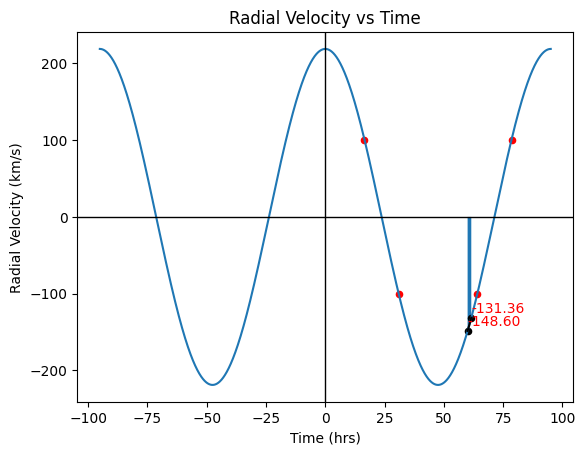

In [139]:
Period_hrs = Period*24
def radial_velocity_curve(t):
    w = (np.pi*2) / Period_hrs
    A = 219
    return A*np.cos(w*t)
times = np.linspace(-Period_hrs,Period_hrs,10000)
plt.plot(times, radial_velocity_curve(times))
plt.axhline(y=0,c='black',lw=1)
plt.axvline(x=0,c='black',lw=1)

#delta1 = #-Period_hrs/2 + 61.5
#delta2 = #-Period_hrs/2 + 64

'''These are the times when the radial velocities 
reach the limit of what we can see on the spectrograph:'''
tmx1 = 16.5300020187
tmx2 = 30.9905683413
tmx3 = 64.0505723787
tmx4 = 78.5111387013
plt.scatter(x=tmx1, y=radial_velocity_curve(tmx1),c='red',s=20)
plt.scatter(x=tmx2, y=radial_velocity_curve(tmx2),c='red',s=20)
plt.scatter(x=tmx3, y=radial_velocity_curve(tmx3),c='red',s=20)
plt.scatter(x=tmx4, y=radial_velocity_curve(tmx4),c='red',s=20)

'''Here is for visualizing a theoretical start and end time.
Choose t1 and t2. The area under the graph between these two points 
will be filled in.
'''
t1 = 60
t2 = tmx3 - 2.5
tvalues=np.linspace(t1,t2,100)
plt.fill_between(tvalues,radial_velocity_curve(tvalues))
plt.plot(tvalues,radial_velocity_curve(tvalues),color='black')
plt.scatter(x=t1, y=radial_velocity_curve(t1),c='black',s=20)
plt.text(t1+.01,radial_velocity_curve(t1)+7,f'{radial_velocity_curve(t1):.2f}',size=10, c='r')
plt.scatter(x=t2, y=radial_velocity_curve(t2),c='black',s=20)
plt.text(t2+.01,radial_velocity_curve(t2)+7,f'{radial_velocity_curve(t2):.2f}',size=10, c='r')
print(f'Radial Velocity Difference Between t1 and t2: \
{(radial_velocity_curve(t1) - radial_velocity_curve(t2)):.3f} km/s \nTime Duration: {(t2-t1):.3f} hrs')

plt.xlabel('Time (hrs)')
plt.ylabel('Radial Velocity (km/s)')
plt.title('Radial Velocity vs Time')
plt.plot()

In [134]:
radial_velocity_curve(tmx1)

100.73999999980371